# Make DNA-origami PERPL analysis plots

## Imports

In [1]:
import time
import numpy as np
import modelling_general
import dna_paint_data_fitting
import modelstats

## Set standard maximum distance over which to plot distances and fit models

In [2]:
fitlength = 250.

## Load relative position data
### Insert path to the relative position data here:

In [3]:
dna_origami_relpos_path = r'../data-perpl/DNA-origami_DNA-PAINT_locs_xyz_PERPL-relpos_250.0filter.csv'


In [4]:
start_time = time.time()
relpos = np.loadtxt(dna_origami_relpos_path, delimiter=',', skiprows=1)
print('This took ' +repr(time.time() - start_time)+ ' s.')

This took 131.16216659545898 s.


### One data point and number of data points:

In [5]:
relpos[0] # This shows the first relative position.
# Distances are in X, Y, Z, XY, XZ, YZ, XYZ

array([ 0.027771  , -0.19042969, -0.21356201,  0.192444  ,  0.21536007,
        0.28613318,  0.2874777 ])

In [6]:
len(relpos) # This shows how many relative positions.

10041236

## Get XYZ distances and plot 1-nm bin histogram
Distances used up to fitlength.

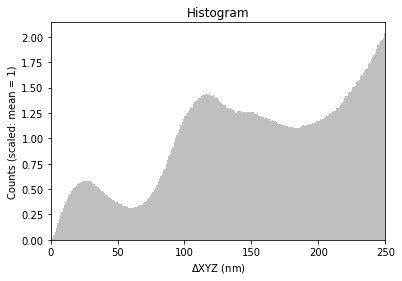

In [7]:
xyz_distances = relpos[:, 6]
xyz_distances = xyz_distances[xyz_distances <= fitlength]
hist_values, bin_edges = dna_paint_data_fitting.plot_xyz_distance_histogram(
    xyz_distances,
    fitlength
    )

## Choose RPD model:

In [8]:
model_with_info = dna_paint_data_fitting.set_up_tri_prism_on_grid_1_length_2disobg_substruct_with_fit_info()

## Fit model to histogram bin values, at bin centres

In [9]:
(params_optimised,
 params_covar,
 params_1sd_error) = modelling_general.fit_model_to_experiment(
                        hist_values,
                        model_with_info.model_rpd,
                        model_with_info.initial_params,
                        model_with_info.param_bounds,
                        fitlength=fitlength
                        )
ssr, aicc = modelstats.aic_from_least_sqr_fit(
    hist_values,
    model_with_info.model_rpd,
    params_optimised,
    fitlength
    )
print('Parameter estimates and uncertainties (stdev):')
print(np.column_stack((params_optimised, params_1sd_error)))
print('\nInitial parameter guesses:')
print(model_with_info.initial_params)
print('\nParameter bounds:')
print(model_with_info.param_bounds)
print('\nSSR = ' +repr(ssr))
print('AICc = ' +repr(aicc))

Parameter estimates and uncertainties (stdev):
[[1.05510939e+02 3.88146031e-01]
 [2.75060098e+00 3.42684903e-01]
 [6.36474766e+00 3.37327802e-01]
 [2.48744294e+00 5.40234483e-02]
 [1.99450051e+01 2.53388526e-01]
 [1.57377115e+01 4.28506298e-01]
 [1.43092022e+01 2.93456916e-01]
 [3.11392803e+02 2.28167700e+01]
 [3.25426358e+02 1.25318254e+02]
 [7.18881479e+01 1.10590399e+01]
 [3.29278865e-03 2.47142852e-04]]

Initial parameter guesses:
[100, 10, 10, 10, 10, 10, 10, 200, 100, 10, 0.001]

Parameter bounds:
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [200, 100, 100, 100, 100, 100, 100, 400, 1000, 100, 0.1])

SSR = 0.20723372806455942
AICc = -1748.5257741717876


## Plot fitted model over histogram data

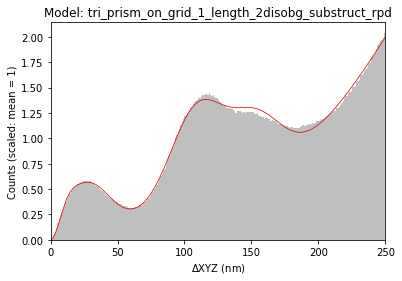

In [10]:
fig, axes = dna_paint_data_fitting.plot_distance_hist_and_fit(
    xyz_distances,
    fitlength,
    params_optimised,
    params_covar,
    model_with_info
)

## Plot fitted model over histogram data, with confidence intervals on the model
### NOTE: IT TAKES A WHILE TO CALCULATE THE CONFIDENCE INTERVALS
### Skip this if you don't need it right now.

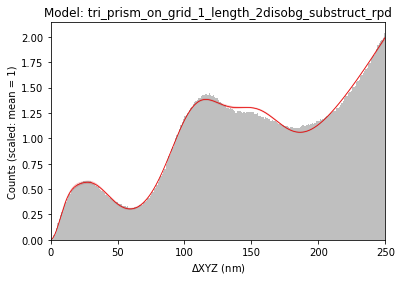

In [11]:
start_time = time.time()
fig, axes = dna_paint_data_fitting.plot_distance_hist_and_fit(
    xyz_distances,
    fitlength,
    params_optimised,
    params_covar,
    model_with_info,
    plot_95ci=True
)


## Akaike weights for the models
Typed in AICc values for the different models here, to obtain relative likelihood, summing to one:

In [12]:
from modelstats import akaike_weights
weights = akaike_weights([1.
])
print(weights)

[1.]


## Plot model components for best model: triangular prism with equal sides
Isotropic 2D background, features repeating on square grid.
Includes localisation precision (repeated localisations of the same molecule) and an unresolvable substructure term.

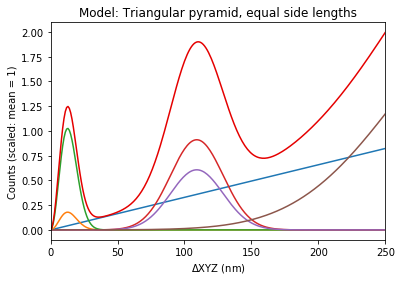

In [13]:
dna_paint_data_fitting.plot_model_components_tri_prism(
    fitlength,
    *params_optimised
    )

Model: tri_prism_on_grid_1_length_2disobg_substruct_rpd
Parameters / 1SD:
[[1.05510939e+02 3.88146031e-01]
 [2.75060098e+00 3.42684903e-01]
 [6.36474766e+00 3.37327802e-01]
 [2.48744294e+00 5.40234483e-02]
 [1.99450051e+01 2.53388526e-01]
 [1.57377115e+01 4.28506298e-01]
 [1.43092022e+01 2.93456916e-01]
 [3.11392803e+02 2.28167700e+01]
 [3.25426358e+02 1.25318254e+02]
 [7.18881479e+01 1.10590399e+01]
 [3.29278865e-03 2.47142852e-04]]
AICc: -1748.5257741717876

Model: cuboid_on_grid_2disobg_substructure_rpd
Parameters / 1SD:
[[9.38619398e+01 1.81011265e+06]
 [9.38586262e+01 4.14429631e+06]
 [9.38596415e+01 5.95395880e+06]
 [2.61089202e+00 5.31000668e-01]
 [5.89405331e+00 5.29133540e-01]
 [2.05308188e+00 1.63692583e-01]
 [2.51152372e+01 2.03691992e+00]
 [1.97207332e+01 1.75004302e+00]
 [1.45622670e+01 5.15963923e-01]
 [2.65017025e+02 1.23431731e+01]
 [2.96281437e+02 1.21791552e+02]
 [6.50214694e+01 1.87535505e+01]
 [6.83474081e-39 1.53401075e-03]]
AICc: -1438.5329005693886

Model: tri_py

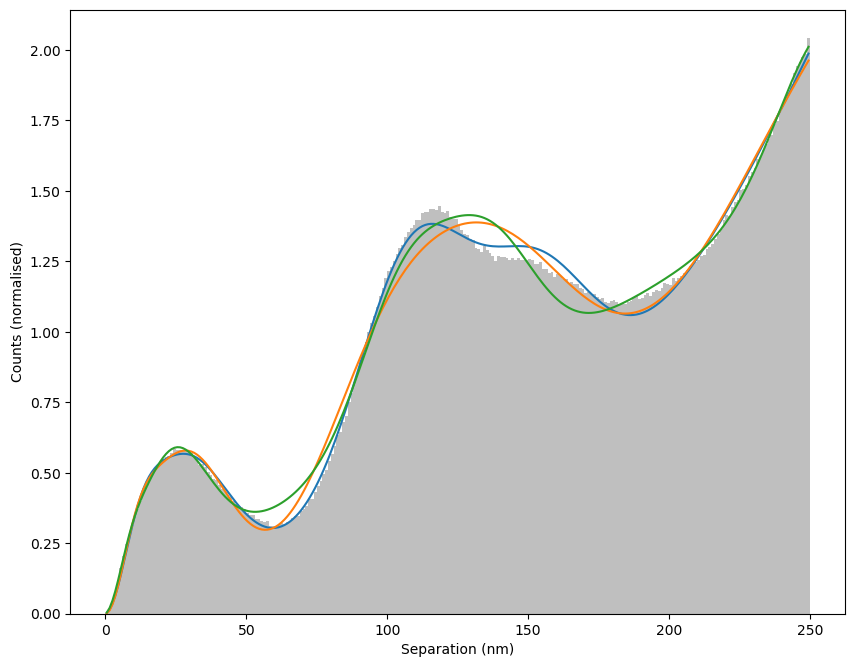

In [14]:
dna_paint_data_fitting.plot_three_models(relpos, fitlength=fitlength)